<a href="https://colab.research.google.com/github/ronnyboi/Data_Analytics/blob/main/Mushroom%20Data%20Analysis/Ron_Mushroom_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mushroom Dataset Analysis**

1. Describe the data (statistics of data set)
2. Visualize the data (histograms, box plots, scatter plots, bar charts, heat map, etc)
3. Preprocess the data (removal or imputation of NaNs/errors/outliers, encoding, generating new useful features, PCA, etc)
4. Implement any one classifier you know (UPPER_CASE word in the end of the file name is the TARGET column for your classification task) and cross validate it (print number of True Positives, True Negatives, False Positives and False Negatives, Accuracy, Precision, Recall)

This dataset is taken from https://www.kaggle.com/uciml/mushroom-classification

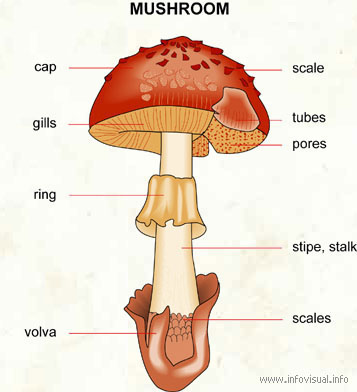

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [ ]:
df=pd.read_csv('mushrooms_CLASS.csv')

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
df.shape

(8124, 23)

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
print (df['class'].unique())

['p' 'e']


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df = df[['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']].apply(le.fit_transform)
df.tail(20)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8104,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,3,4,2
8105,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,8,4,2
8106,0,3,2,4,0,5,0,0,0,6,0,0,2,2,5,5,0,1,1,4,3,4,2
8107,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,3,1,2
8108,1,3,3,2,0,8,1,0,1,0,1,0,1,2,6,7,0,2,1,0,7,4,2
8109,0,0,2,8,0,5,1,1,0,10,0,0,2,2,7,7,0,2,2,4,7,2,1
8110,0,5,2,4,0,5,0,0,0,6,0,0,2,2,5,5,0,1,1,4,3,4,2
8111,0,3,2,8,0,5,1,1,0,7,0,0,2,2,7,7,0,2,2,4,7,2,1
8112,0,3,2,4,0,5,0,0,0,6,0,0,2,2,5,5,0,0,1,4,0,4,2
8113,1,3,3,2,0,8,1,0,1,0,1,0,1,1,6,6,0,2,1,0,7,4,0


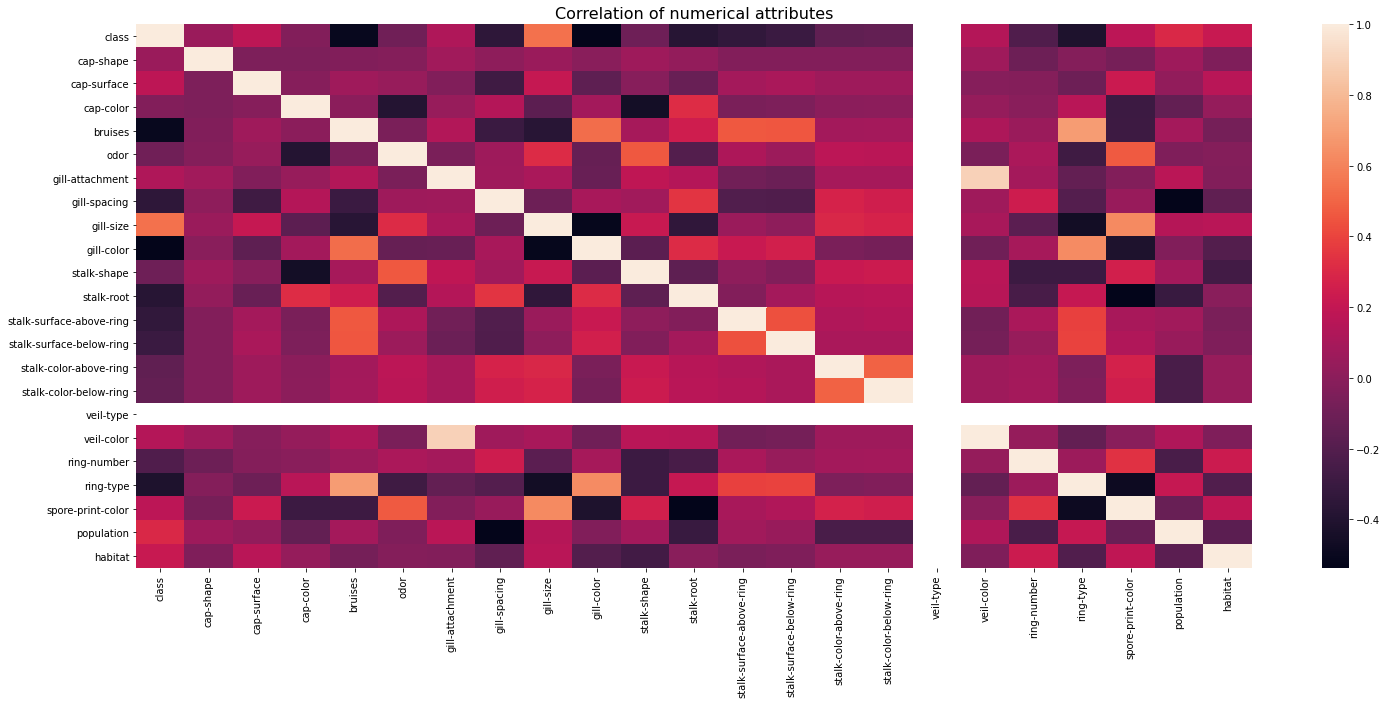

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr()

f, ax = plt.subplots(figsize=(25,10))
plt.title('Correlation of numerical attributes', size=16)
sns.heatmap(correlation)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

<Figure size 864x1296 with 0 Axes>

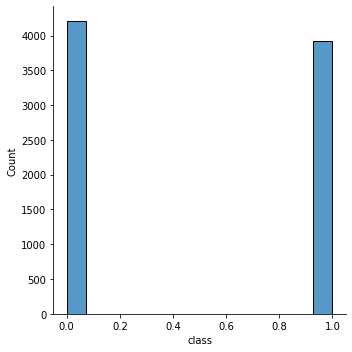

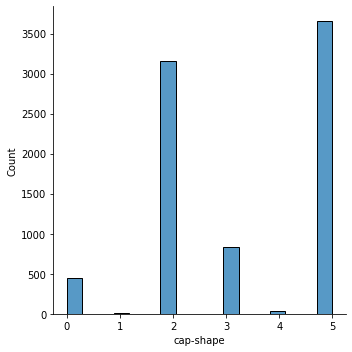

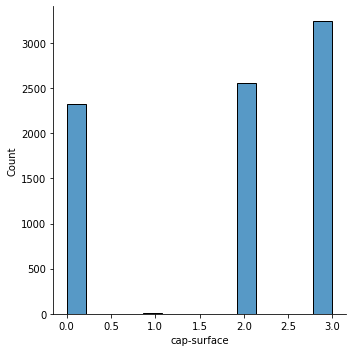

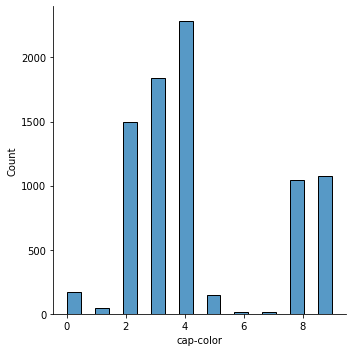

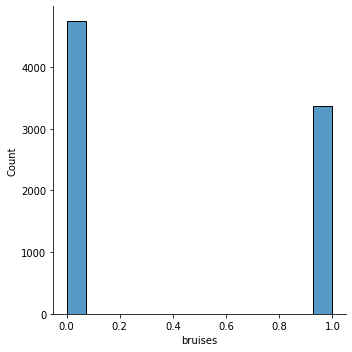

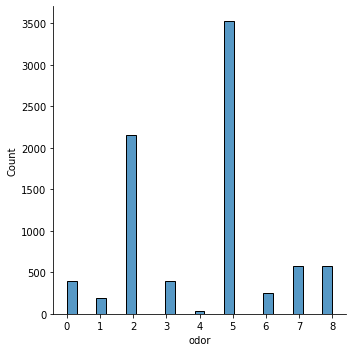

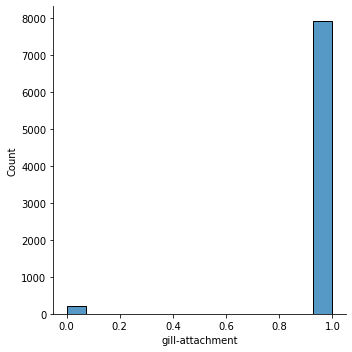

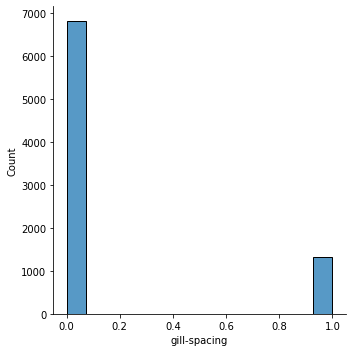

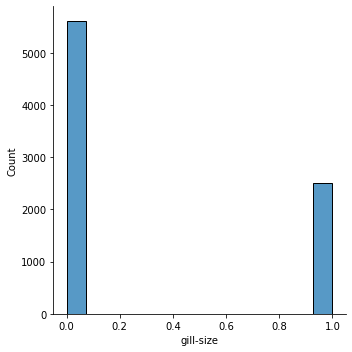

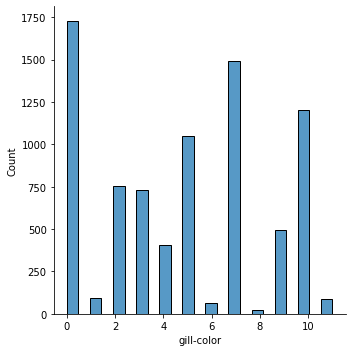

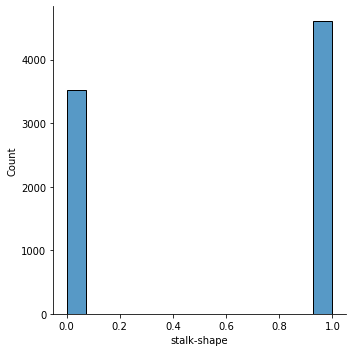

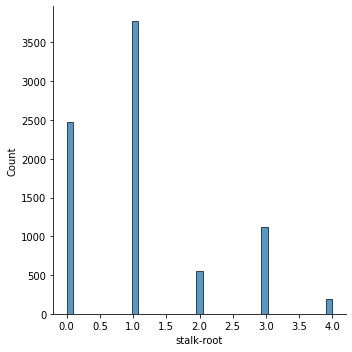

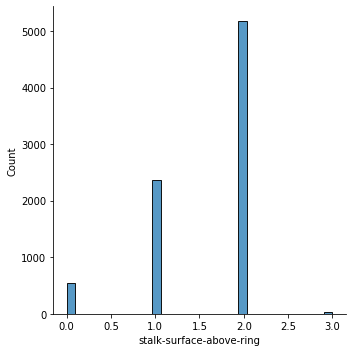

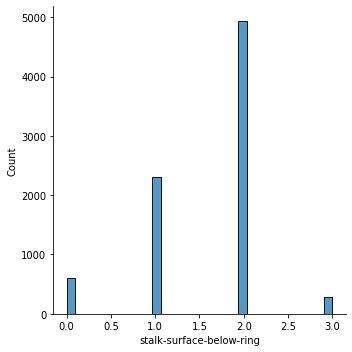

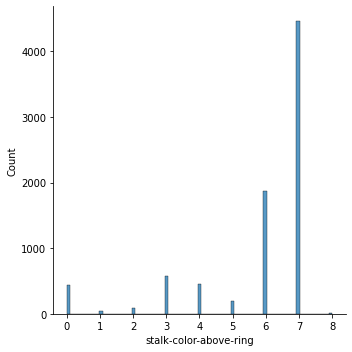

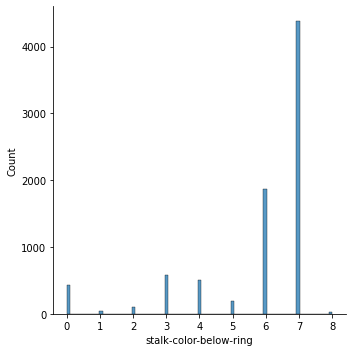

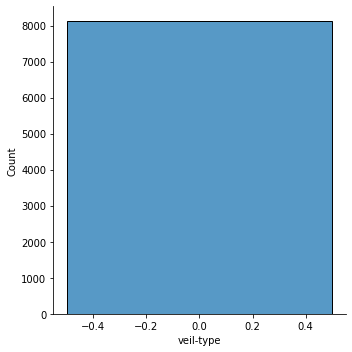

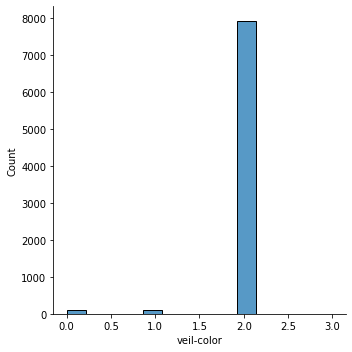

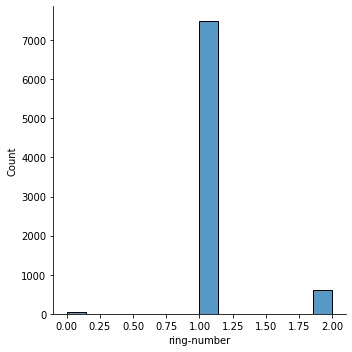

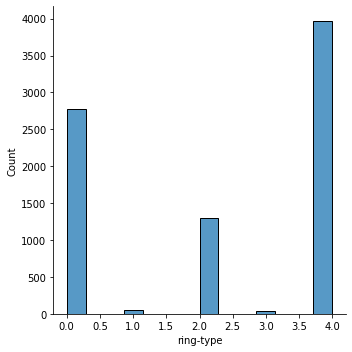

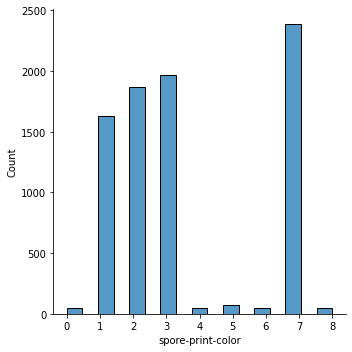

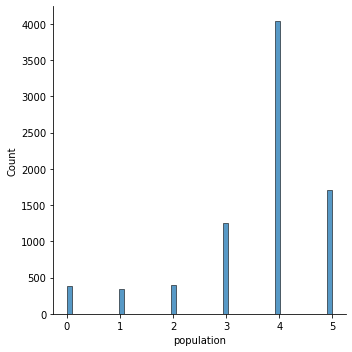

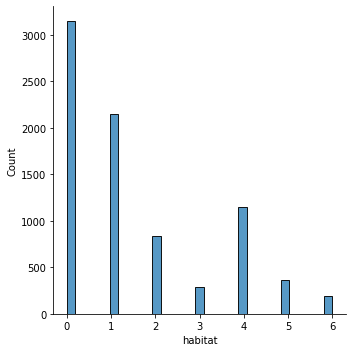

In [ ]:
num_attributes = df.select_dtypes(exclude='object')

fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    sns.displot(num_attributes.iloc[:,i],kde=False)
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

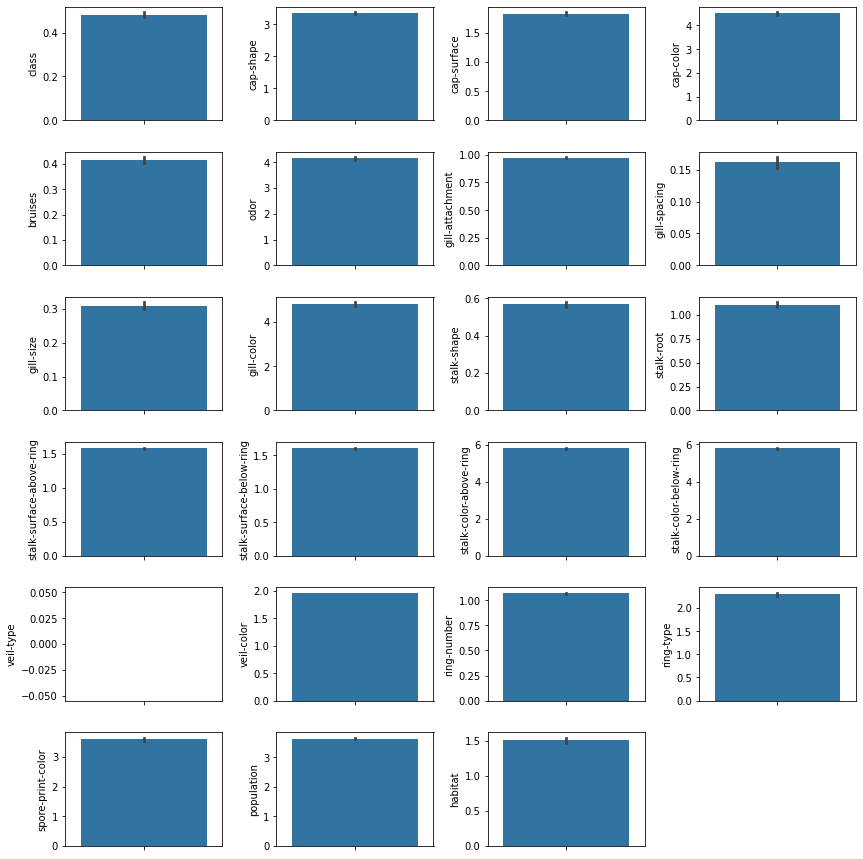

In [ ]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.barplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

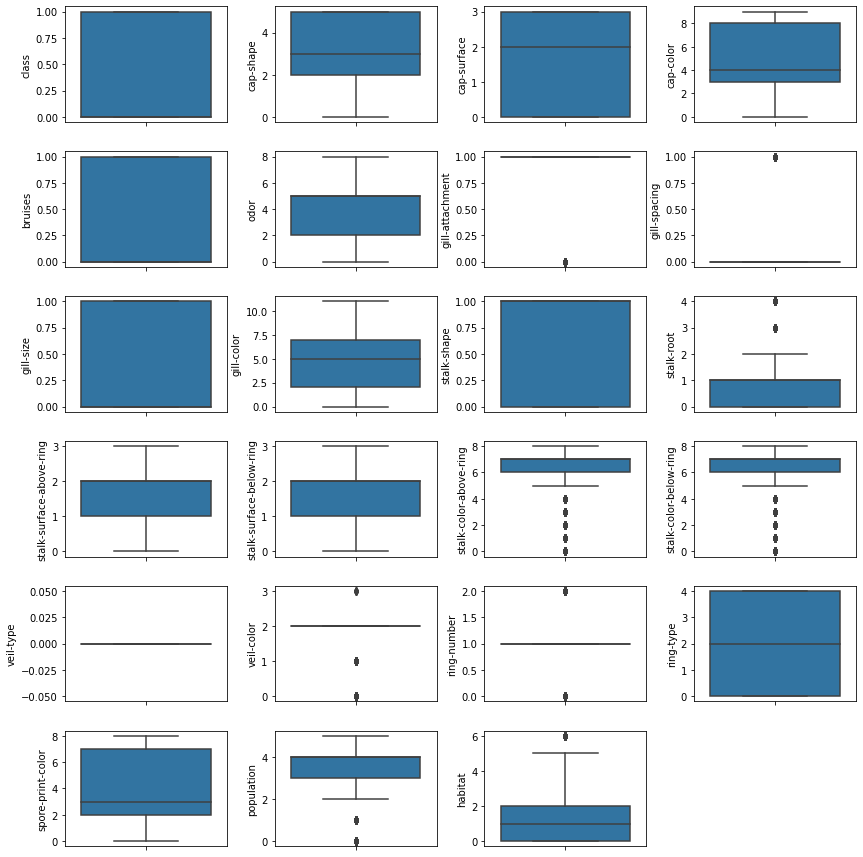

In [ ]:
fig = plt.figure(figsize=(12, 18))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

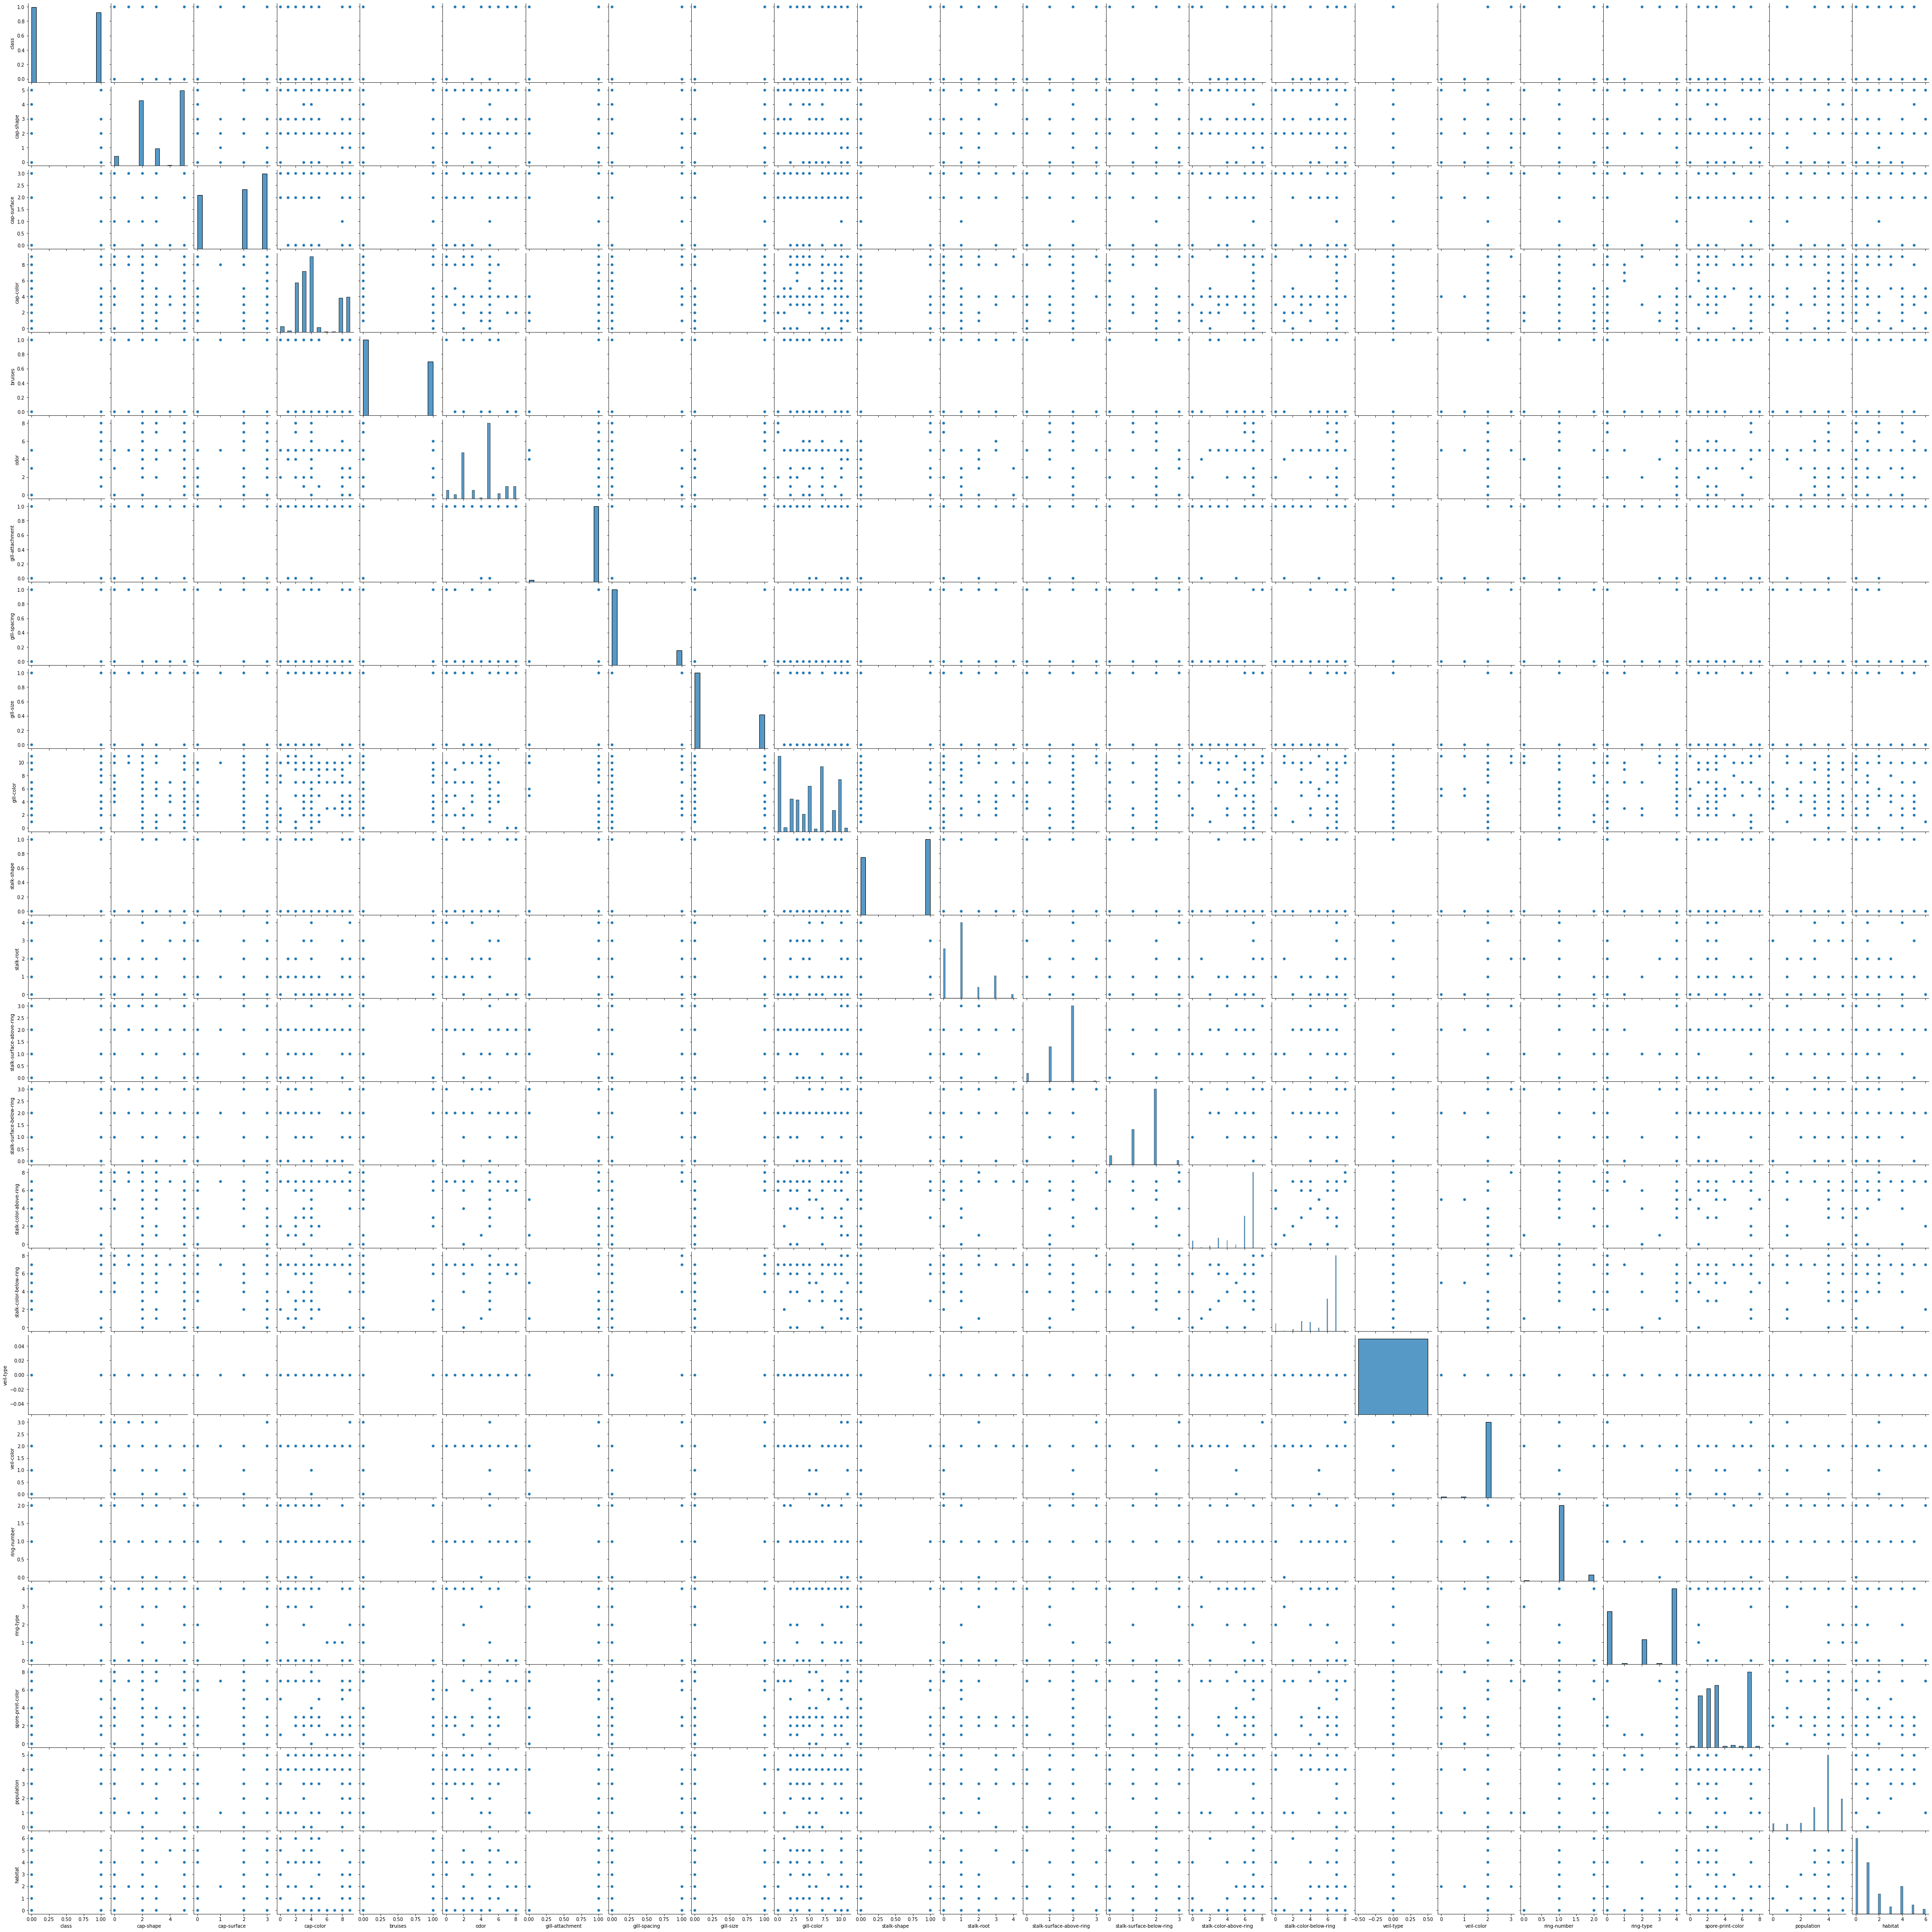

In [ ]:
sns.pairplot(df)

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
x = df.loc[:, features].values
print(x[:3])
y = df.loc[:,['class']].values
x = StandardScaler().fit_transform(x)
print(x[:3])
x.shape

[[5 2 4 1 6 1 0 1 4 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [5 2 9 1 0 1 0 0 4 0 2 2 2 7 7 0 2 1 4 3 2 1]
 [0 2 8 1 3 1 0 0 5 0 2 2 2 7 7 0 2 1 4 3 2 3]]
[[ 1.02971224  0.14012794 -0.19824983  1.18591657  0.88193766  0.16289645
  -0.43886364  1.49468272 -0.22899776 -1.14480575  1.78146019  0.68377765
   0.58638466  0.62244139  0.63199138  0.          0.14203663 -0.25613174
   0.94808086 -0.67019486 -0.5143892   2.03002809]
 [ 1.02971224  0.14012794  1.76587407  1.18591657 -1.97031615  0.16289645
  -0.43886364 -0.66903831 -0.22899776 -1.14480575  0.83898933  0.68377765
   0.58638466  0.62244139  0.63199138  0.          0.14203663 -0.25613174
   0.94808086 -0.2504706  -1.31310821 -0.29572966]
 [-2.08704716  0.14012794  1.37304929  1.18591657 -0.54418924  0.16289645
  -0.43886364 -0.66903831  0.05347685 -1.14480575  0.83898933  0.68377765
   0.58638466  0.62244139  0.63199138  0.          0.14203663 -0.25613174
   0.94808086 -0.2504706  -1.31310821  0.86714922]]


(8124, 22)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(x)
df_pr = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 
                                                                  'principal component 4', 'principal component 5', 'principal component 6', 
                                                                  'principal component 7', 'principal component 8', 'principal component 9', 
                                                                  'principal component 10', 'principal component 11'])
df_pr.head(3)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11
0,-0.574322,-0.975781,-1.221762,0.185505,-1.451920,-1.538255,1.206300,1.545333,1.604984,0.405963,-0.690598
1,-2.282102,0.279066,-1.200497,0.272056,-1.501531,-1.486986,1.082778,-0.340684,-0.661795,-0.158524,0.194346
2,-1.858036,-0.270972,-1.372371,1.055963,-1.810316,-0.874188,-1.768193,-0.286344,0.674741,0.339317,-0.293566


In [ ]:
df_fin = pd.concat([df_pr, df[['class']]], axis = 1)
df_fin.head(5)

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,class
0,-0.574322,-0.975781,-1.221762,0.185505,-1.451920,-1.538255,1.206300,1.545333,1.604984,0.405963,-0.690598,1
1,-2.282102,0.279066,-1.200497,0.272056,-1.501531,-1.486986,1.082778,-0.340684,-0.661795,-0.158524,0.194346,0
2,-1.858036,-0.270972,-1.372371,1.055963,-1.810316,-0.874188,-1.768193,-0.286344,0.674741,0.339317,-0.293566,0
3,-0.884780,-0.756468,-1.342068,0.370162,-2.111239,-2.110207,1.089952,1.243782,0.709039,0.478215,-1.285118,1
4,0.689613,1.239262,-3.113237,0.814721,1.541685,-0.555917,0.585614,1.598763,-0.851453,1.436707,-0.015359,0


In [ ]:
X = df_fin.iloc[:,0:11]
y = df_fin['class']
print(X.shape)
print(y.shape)

(8124, 11)
(8124,)


In [ ]:
X.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11
0,-0.574322,-0.975781,-1.221762,0.185505,-1.451920,-1.538255,1.206300,1.545333,1.604984,0.405963,-0.690598
1,-2.282102,0.279066,-1.200497,0.272056,-1.501531,-1.486986,1.082778,-0.340684,-0.661795,-0.158524,0.194346
2,-1.858036,-0.270972,-1.372371,1.055963,-1.810316,-0.874188,-1.768193,-0.286344,0.674741,0.339317,-0.293566
3,-0.884780,-0.756468,-1.342068,0.370162,-2.111239,-2.110207,1.089952,1.243782,0.709039,0.478215,-1.285118
4,0.689613,1.239262,-3.113237,0.814721,1.541685,-0.555917,0.585614,1.598763,-0.851453,1.436707,-0.015359


In [ ]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5686, 11)
(5686,)
(2438, 11)
(2438,)


# Decision Tree Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [ ]:
dt_predict1 = dt.predict(X_train)
dt_conf_matrix = confusion_matrix(y_train, dt_predict1)
dt_acc_score = accuracy_score(y_train, dt_predict1)
dt_class_report = classification_report(y_train, dt_predict1) 
preds_dt = dt.predict(X_train)

print('Accuracy Score :', '%.2f' %dt_acc_score)
print('Classification Report :')
print(dt_class_report)

Accuracy Score : 1.00
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2989
           1       1.00      1.00      1.00      2697

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686



In [ ]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
dt_class_report = classification_report(y_test, dt_predict) 
preds_dt = dt.predict(X_test)

print('Accuracy Score :', '%.2f' %dt_acc_score)
print('Classification Report :')
print(dt_class_report)

Accuracy Score : 0.99
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1219
           1       0.99      1.00      0.99      1219

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



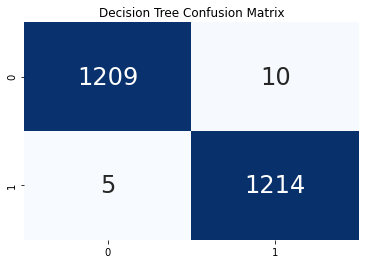

In [ ]:
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,preds_dt),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

# KNN classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
knn_class_report = classification_report(y_test, knn_predict) 
preds_knn = knn.predict(X_test)

print('Accuracy Score :', '%.2f' %knn_acc_score)
print('Classification Report :')
print(knn_class_report)

Accuracy Score : 1.00
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1219
           1       1.00      1.00      1.00      1219

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [ ]:
from sklearn.metrics import confusion_matrix  
tn, fp, fn, tp=confusion_matrix(y_test, knn_predict).ravel()
print("True Positive:", tp)
print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)

True Positive: 1217
True Negative: 1216
False Positive: 3
False Negative: 2


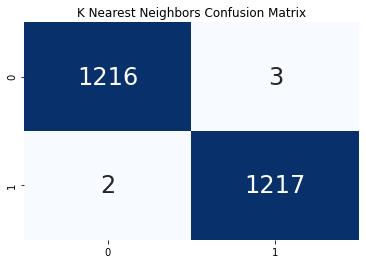

In [ ]:
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,preds_knn),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv=10)
print(score)
print('Mean accuracy :')
print('%.2f' %score.mean())

[0.78597786 1.         1.         1.         0.99014778 0.99507389
 1.         1.         0.88669951 0.98522167]
Mean accuracy :
0.96
